## **Install pycart library**

PyCaret anomaly detection module provides several pre-processing features that can be configured when initializing the setup through setup function. It has over 12 algorithms and a few plots to analyze the results of anomaly detection. PyCaret's anomaly detection module also implements a unique function tune_model that allows you to tune the hyperparameters of the anomaly detection model to optimize the supervised learning objective such as AUC for classification or R2 for regression.

In [1]:
! pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 7.7 MB/s 
     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 1.7 MB 40.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 2.0 MB 18.9 MB/s 
     |████████████████████████████████| 17.9 MB 338 kB/s 
     |████████████████████████████████| 167 kB 48.6 MB/s 
     |████████████████████████████████| 10.4 MB 46.1 MB/s 
     |████████████████████████████████| 262 kB 55.2 MB/s 
     |████████████████████████████████| 6.8 MB 63.3 MB/s 
     |████████████████████████████████| 1.3 MB 40.6 MB/s 
     |████████████████████████████████| 122 kB 48.0 MB/s 
     |████████████████████████████████| 

In [2]:
! pip uninstall Jinja2 --yes
! pip install Jinja2 


Found existing installation: Jinja2 2.11.3
Uninstalling Jinja2-2.11.3:
  Successfully uninstalled Jinja2-2.11.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 8.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have fo

## **Import important libraries and load the dataset**

In [53]:
import pandas as pd #to deal with dataframes in python
import numpy as np #tp deal with arrays
import matplotlib.pyplot as plt #for plotting several lines with different format styles in one command using arrays.
import seaborn as sns #for visualization
from sklearn.manifold import TSNE # to visualize high-dimensional data.
import plotly.express as px #to visualize a variety of types of data
%matplotlib inline

In [54]:
#read the dataset
df = pd.read_csv('/content/Dataset_to_be_used_in_anomaly_detection.csv')
df.head()

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,9,-1.042570,-0.241098,-1.267957,0.414568
1,10,-1.056986,-0.245590,-1.165454,0.411869
2,11,-1.071858,-0.256787,-1.028780,0.407472
3,12,-1.084518,-0.257502,-0.850609,0.367564
4,13,-0.974811,-0.105985,-0.625045,0.236174


In [3]:
data = df.drop('Unnamed: 0',axis=1)
#to get some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Follower_measure_x_follower  98 non-null     float64
 1   Follower_measure_y_follower  98 non-null     float64
 2   Leader_measure_x_leader      98 non-null     float64
 3   Leader_measure_y_leader      98 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB


In [4]:
#to visualize the data using tsne
tsne = TSNE(n_components= 2 ,random_state=0)
z = tsne.fit_transform(data)

In [5]:
from pycaret.anomaly import *
exp_ano101 = setup(data, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(98, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(98, 4)"
9,CPU Jobs,-1


In [6]:
#to view the models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


## **Apply SVM model**

In [55]:
svm = create_model('svm')
print(svm)

OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


In [56]:
svm_model = assign_model(svm)
svm_model.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,-0.846592
1,-1.056986,-0.245590,-1.165454,0.411869,0,-0.859350
2,-1.071858,-0.256787,-1.028780,0.407472,0,-0.760461
3,-1.084518,-0.257502,-0.850609,0.367564,0,-0.665501
4,-0.974811,-0.105985,-0.625045,0.236174,0,-0.400389


In [57]:
svm_model_anomlies = svm_model[svm_model['Anomaly']==1]
svm_model_anomlies

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
31,0.360847,-0.459538,0.767382,-0.489506,1,8.172418
32,0.432356,-0.526272,0.795491,-0.493113,1,8.637892
33,0.412900,-0.574391,0.827058,-0.568237,1,8.695015
34,0.463492,-0.562305,0.734001,-0.737032,1,8.338360
91,-1.535425,0.260158,-2.816451,0.535399,1,7.785698


[Text(0.5, 1.0, 'SVM TSNE plot in 2D (0 is not anomely 1 is anomely)')]

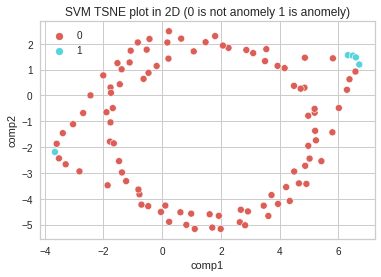

In [58]:
df_3 = pd.DataFrame()
df_3['comp1'] = z[:,0]
df_3['comp2'] = z[:,1]
df_3['target'] = svm_model['Anomaly']
sns.scatterplot(x="comp1", y="comp2", hue=df_3.target.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df_3).set(title="SVM TSNE plot in 2D (0 is not anomely 1 is anomely)") 

In [59]:
plot_model(svm, plot = 'tsne')

In [60]:
plot_model(svm, plot = 'umap')

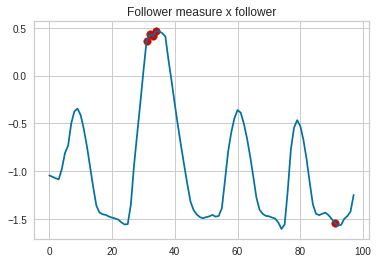

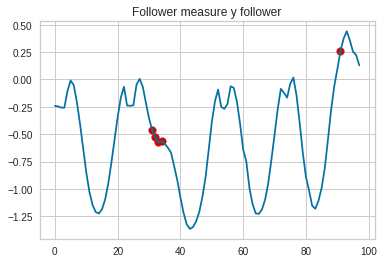

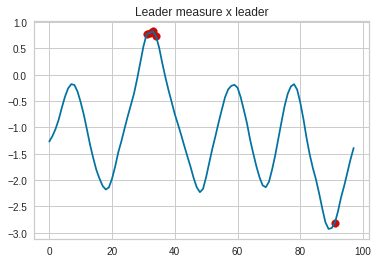

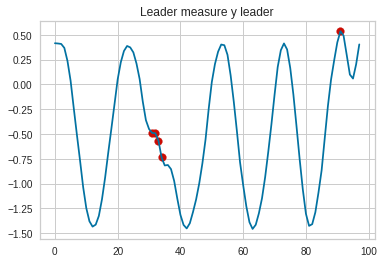

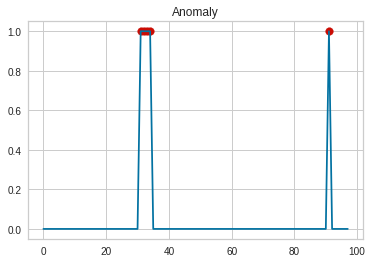

In [61]:
#time plot for the data
for column in data.columns:
    plt.plot(svm_model[column])
    plt.scatter(svm_model_anomlies.index, svm_model_anomlies[column], c='r', marker='o', s=60, alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

## **Model evaluation for SVM**

In [38]:
svm_model.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,-0.846592
1,-1.056986,-0.245590,-1.165454,0.411869,0,-0.859350
2,-1.071858,-0.256787,-1.028780,0.407472,0,-0.760461
3,-1.084518,-0.257502,-0.850609,0.367564,0,-0.665501
4,-0.974811,-0.105985,-0.625045,0.236174,0,-0.400389


In [39]:
svm_model[svm_model['Anomaly']==1]

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
31,0.360847,-0.459538,0.767382,-0.489506,1,8.172418
32,0.432356,-0.526272,0.795491,-0.493113,1,8.637892
33,0.412900,-0.574391,0.827058,-0.568237,1,8.695015
34,0.463492,-0.562305,0.734001,-0.737032,1,8.338360
91,-1.535425,0.260158,-2.816451,0.535399,1,7.785698


In [40]:
anomely_result_svm = svm_model['Anomaly']

In [41]:
from sklearn.metrics import classification_report
print(classification_report(anomely_result_svm,actual_label))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        93
           1       0.42      1.00      0.59         5

    accuracy                           0.93        98
   macro avg       0.71      0.96      0.77        98
weighted avg       0.97      0.93      0.94        98



## **Apply knn model**

kNN Is a Supervised Learner for Both Classification and Regression. Supervised machine learning algorithms can be split into two groups based on the type of target variable that they can predict: Classification is a prediction task with a categorical target variable.

In [62]:
#create KNN model
knn = create_model('knn')
print(knn)

KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)


In [63]:
knn_model = assign_model(knn)
knn_model.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,0.446403
1,-1.056986,-0.245590,-1.165454,0.411869,0,0.476462
2,-1.071858,-0.256787,-1.028780,0.407472,0,0.420715
3,-1.084518,-0.257502,-0.850609,0.367564,0,0.385327
4,-0.974811,-0.105985,-0.625045,0.236174,0,0.380718


In [64]:
knn_model_anomlies = knn_model[knn_model['Anomaly']==1]
knn_model_anomlies

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
37,0.407215,-0.667258,-0.046350,-0.854807,1,0.798124
88,-1.431881,-0.282536,-2.802852,0.047603,1,0.758008
89,-1.458214,-0.064960,-2.928637,0.242762,1,0.775092
91,-1.535425,0.260158,-2.816451,0.535399,1,0.737135


[Text(0.5, 1.0, 'KNN TSNE plot in 2D (0 is not anomely 1 is anomely)')]

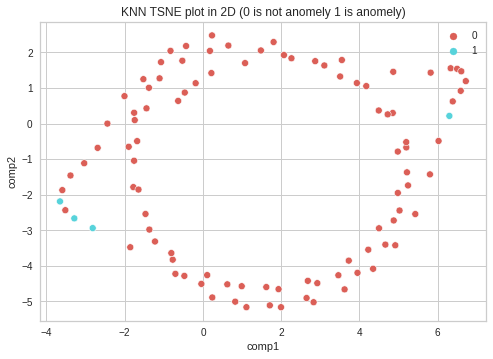

In [ ]:
df_2 = pd.DataFrame()
df_2['comp1'] = z[:,0]
df_2['comp2'] = z[:,1]
df_2['target'] = knn_model['Anomaly']
sns.scatterplot(x="comp1", y="comp2", hue=df_2.target.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df_2).set(title="KNN TSNE plot in 2D (0 is not anomely 1 is anomely)") 

In [ ]:
plot_model(knn, plot = 'tsne')

In [ ]:
plot_model(knn, plot = 'umap')

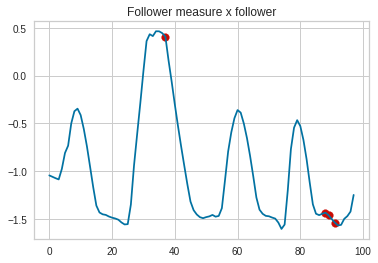

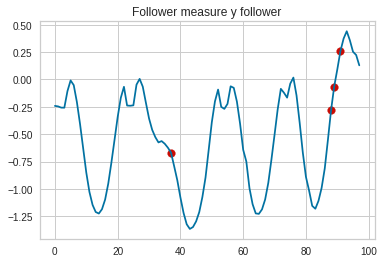

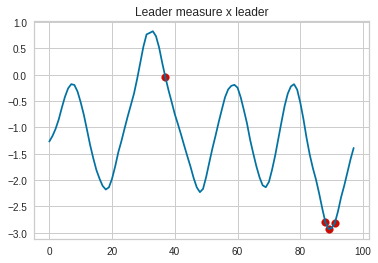

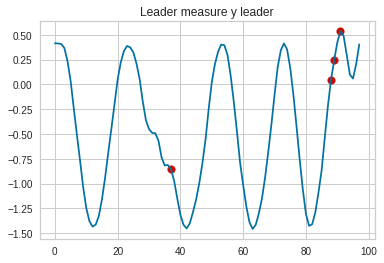

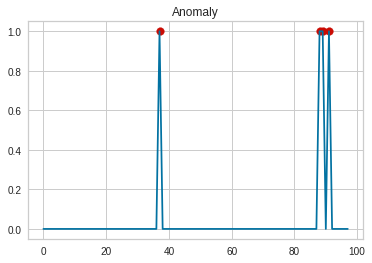

In [65]:
#time plot for the data
for column in data.columns:
    plt.plot(knn_model[column])
    plt.scatter(knn_model_anomlies.index, knn_model_anomlies[column], c='r', marker='o', s=60, alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

## **Model evaluation for KNN**

In [66]:
knn_model.tail()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
93,-1.559131,0.440215,-2.325538,0.295837,0,0.697068
94,-1.496434,0.357878,-2.105013,0.098846,0,0.651218
95,-1.467606,0.253125,-1.857816,0.058397,0,0.540269
96,-1.420551,0.223617,-1.606946,0.202749,0,0.402136
97,-1.246517,0.129141,-1.390368,0.402667,0,0.421741


In [67]:
knn_model[knn_model['Anomaly']==1]

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
37,0.407215,-0.667258,-0.046350,-0.854807,1,0.798124
88,-1.431881,-0.282536,-2.802852,0.047603,1,0.758008
89,-1.458214,-0.064960,-2.928637,0.242762,1,0.775092
91,-1.535425,0.260158,-2.816451,0.535399,1,0.737135


In [68]:
anomely_result_knn = knn_model['Anomaly']

In [69]:
df_evaluate = pd.read_csv('/content/Dataset_to_be_used_in_performance_comparison.csv')
df_evaluate

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,labels
0,9,-1.042570,-0.241098,-1.267957,0.414568,0.0
1,10,-1.056986,-0.245590,-1.165454,0.411869,0.0
2,11,-1.071858,-0.256787,-1.028780,0.407472,0.0
3,12,-1.084518,-0.257502,-0.850609,0.367564,0.0
4,13,-0.974811,-0.105985,-0.625045,0.236174,0.0
...,...,...,...,...,...,...
93,102,-1.559131,0.440215,-2.325538,0.295837,0.0
94,103,-1.496434,0.357878,-2.105013,0.098846,0.0
95,104,-1.467606,0.253125,-1.857816,0.058397,0.0
96,105,-1.420551,0.223617,-1.606946,0.202749,0.0


In [70]:
df_evaluate[df_evaluate['labels']==1]

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,labels
30,39,0.046769,-0.356131,0.536808,-0.450804,1.0
31,40,0.360847,-0.459538,0.767382,-0.489506,1.0
32,41,0.432356,-0.526272,0.795491,-0.493113,1.0
33,42,0.412900,-0.574391,0.827058,-0.568237,1.0
34,43,0.463492,-0.562305,0.734001,-0.737032,1.0
35,44,0.462689,-0.586497,0.517651,-0.817752,1.0
87,96,-1.443234,-0.551990,-2.540817,-0.218693,1.0
88,97,-1.431881,-0.282536,-2.802852,0.047603,1.0
89,98,-1.458214,-0.064960,-2.928637,0.242762,1.0
90,99,-1.498133,0.092471,-2.912866,0.423525,1.0


In [71]:
actual_label = df_evaluate['labels']

In [72]:
from sklearn.metrics import classification_report
print(classification_report(anomely_result_knn,actual_label))


              precision    recall  f1-score   support

           0       0.99      0.90      0.94        94
           1       0.25      0.75      0.38         4

    accuracy                           0.90        98
   macro avg       0.62      0.83      0.66        98
weighted avg       0.96      0.90      0.92        98



## **Apply PCA model**

In [73]:
pca = create_model('pca')
print(pca)

PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=123, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)


In [74]:
pca_model = assign_model(pca)
pca_model.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,171.243668
1,-1.056986,-0.245590,-1.165454,0.411869,0,171.205205
2,-1.071858,-0.256787,-1.028780,0.407472,0,171.879672
3,-1.084518,-0.257502,-0.850609,0.367564,0,170.120084
4,-0.974811,-0.105985,-0.625045,0.236174,0,163.779848


[Text(0.5, 1.0, 'PCA TSNE plot in 2D (0 is not anomely 1 is anomely)')]

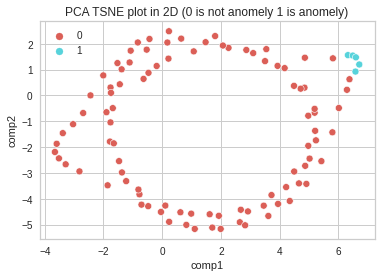

In [75]:
df_4 = pd.DataFrame()
df_4['comp1'] = z[:,0]
df_4['comp2'] = z[:,1]
df_4['target'] = pca_model['Anomaly']
sns.scatterplot(x="comp1", y="comp2", hue=df_4.target.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df_4).set(title="PCA TSNE plot in 2D (0 is not anomely 1 is anomely)") 

In [76]:
plot_model(pca, plot = 'tsne')

In [77]:
plot_model(pca, plot = 'umap')

In [78]:
pca_model_anomlies = pca_model[pca_model['Anomaly']==1]
pca_model_anomlies

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
31,0.360847,-0.459538,0.767382,-0.489506,1,293.785369
32,0.432356,-0.526272,0.795491,-0.493113,1,304.704596
33,0.412900,-0.574391,0.827058,-0.568237,1,305.129763
34,0.463492,-0.562305,0.734001,-0.737032,1,303.068371
35,0.462689,-0.586497,0.517651,-0.817752,1,290.703717


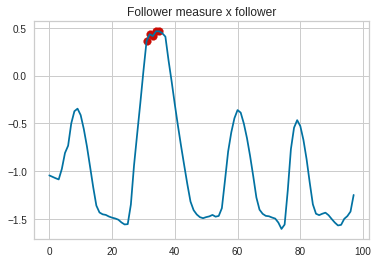

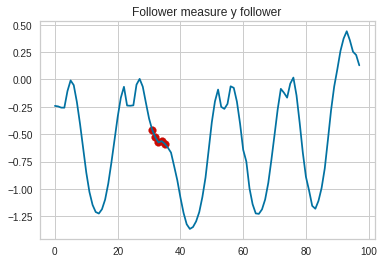

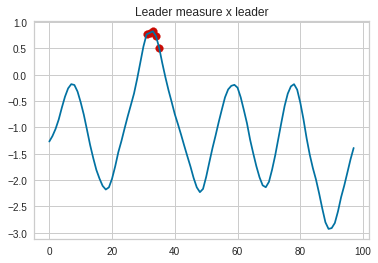

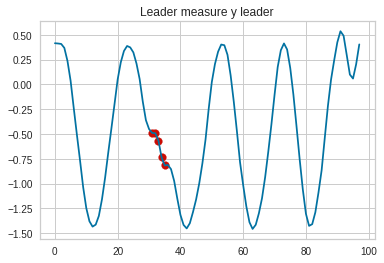

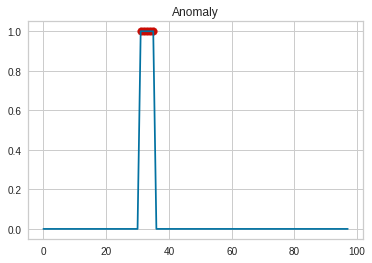

In [79]:
#time plot for the data
for column in data.columns:
    plt.plot(pca_model[column])
    plt.scatter(pca_model_anomlies.index, pca_model_anomlies[column], c='r', marker='o', s=60, alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

## **Model evaluation for PCA**

In [49]:
pca_model.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,-1.042570,-0.241098,-1.267957,0.414568,0,171.243668
1,-1.056986,-0.245590,-1.165454,0.411869,0,171.205205
2,-1.071858,-0.256787,-1.028780,0.407472,0,171.879672
3,-1.084518,-0.257502,-0.850609,0.367564,0,170.120084
4,-0.974811,-0.105985,-0.625045,0.236174,0,163.779848


In [50]:
pca_model[pca_model['Anomaly']==1]

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
31,0.360847,-0.459538,0.767382,-0.489506,1,293.785369
32,0.432356,-0.526272,0.795491,-0.493113,1,304.704596
33,0.412900,-0.574391,0.827058,-0.568237,1,305.129763
34,0.463492,-0.562305,0.734001,-0.737032,1,303.068371
35,0.462689,-0.586497,0.517651,-0.817752,1,290.703717


In [51]:
anomely_result_pca = pca_model['Anomaly']

In [52]:
from sklearn.metrics import classification_report
print(classification_report(anomely_result_pca,actual_label))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        93
           1       0.42      1.00      0.59         5

    accuracy                           0.93        98
   macro avg       0.71      0.96      0.77        98
weighted avg       0.97      0.93      0.94        98



## **Apply DBSCAN Model**

In [7]:
data

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,-1.042570,-0.241098,-1.267957,0.414568
1,-1.056986,-0.245590,-1.165454,0.411869
2,-1.071858,-0.256787,-1.028780,0.407472
3,-1.084518,-0.257502,-0.850609,0.367564
4,-0.974811,-0.105985,-0.625045,0.236174
...,...,...,...,...
93,-1.559131,0.440215,-2.325538,0.295837
94,-1.496434,0.357878,-2.105013,0.098846
95,-1.467606,0.253125,-1.857816,0.058397
96,-1.420551,0.223617,-1.606946,0.202749


In [8]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=7)
dbscan.fit(data)
y_pred = dbscan.labels_

In [9]:
## here 0 is repersent for non anomely and -1 represent for tne anomoly points as nois
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0])

In [10]:
# here we will map -1 to 1 as anomely 
y_pred = y_pred*-1

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [12]:
df_1 = pd.DataFrame()
df_1['comp1'] = z[:,0]
df_1['comp2'] = z[:,1]
df_1['target'] = y_pred

[Text(0.5, 1.0, 'DBSCAN TSNE plot in 2D (0 is not anomely 1 is anomely)')]

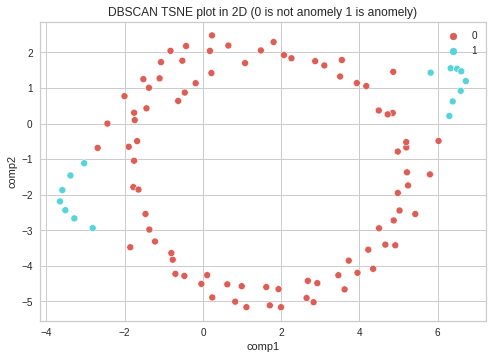

In [13]:
sns.scatterplot(x="comp1", y="comp2", hue=df_1.target.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df_1).set(title="DBSCAN TSNE plot in 2D (0 is not anomely 1 is anomely)") 


In [14]:
score_db = data

In [15]:
score_db['Anomaly'] = y_pred

In [16]:
score_db

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly
0,-1.042570,-0.241098,-1.267957,0.414568,0
1,-1.056986,-0.245590,-1.165454,0.411869,0
2,-1.071858,-0.256787,-1.028780,0.407472,0
3,-1.084518,-0.257502,-0.850609,0.367564,0
4,-0.974811,-0.105985,-0.625045,0.236174,0
...,...,...,...,...,...
93,-1.559131,0.440215,-2.325538,0.295837,1
94,-1.496434,0.357878,-2.105013,0.098846,1
95,-1.467606,0.253125,-1.857816,0.058397,0
96,-1.420551,0.223617,-1.606946,0.202749,0


In [17]:
dbscan_model_anomlies = score_db[score_db['Anomaly']==1]
dbscan_model_anomlies

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly
30,0.046769,-0.356131,0.536808,-0.450804,1
31,0.360847,-0.459538,0.767382,-0.489506,1
32,0.432356,-0.526272,0.795491,-0.493113,1
33,0.412900,-0.574391,0.827058,-0.568237,1
34,0.463492,-0.562305,0.734001,-0.737032,1
35,0.462689,-0.586497,0.517651,-0.817752,1
36,0.443363,-0.622341,0.224326,-0.813084,1
37,0.407215,-0.667258,-0.046350,-0.854807,1
88,-1.431881,-0.282536,-2.802852,0.047603,1
89,-1.458214,-0.064960,-2.928637,0.242762,1


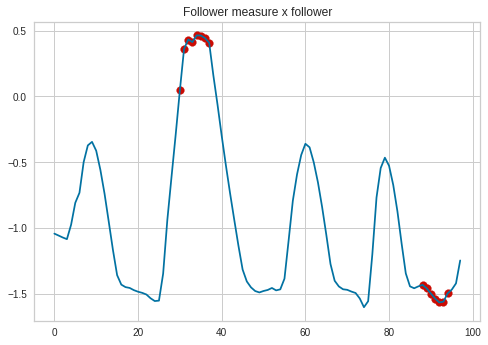

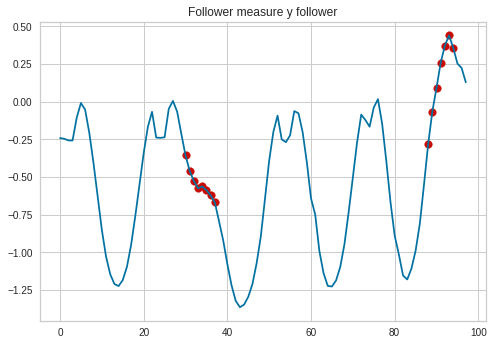

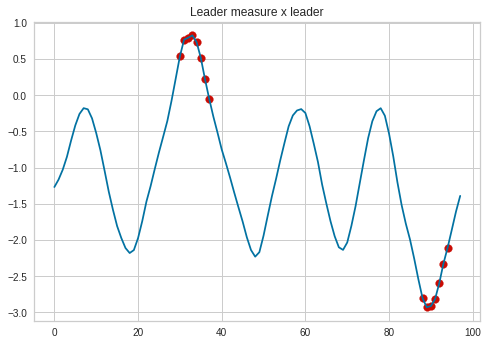

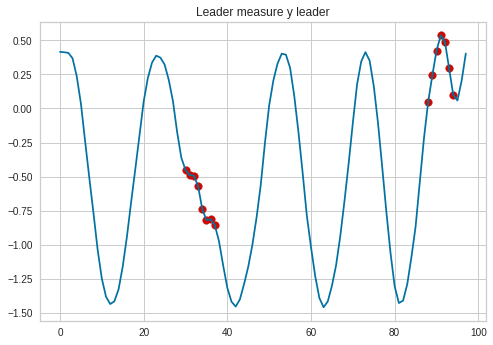

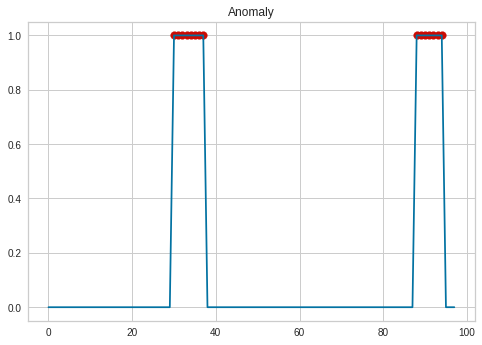

In [18]:
#time plot for the data
for column in data.columns:
    plt.plot(score_db[column])
    plt.scatter(dbscan_model_anomlies.index, dbscan_model_anomlies[column], c='r', marker='o', s=60, alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

## **Model evaluation for DBSCAN**

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,actual_label))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.92      0.73      0.81        15

    accuracy                           0.95        98
   macro avg       0.94      0.86      0.89        98
weighted avg       0.95      0.95      0.95        98



## **Conclusion**

After applying the four models and evaluating them, we notice that the accuracy differs between the 4 models, so the accuracies are shown in the following tables:

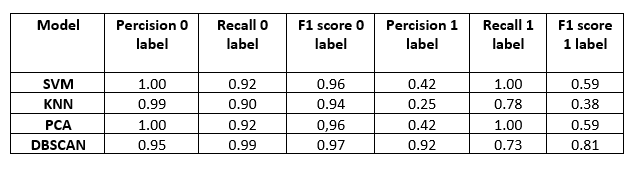


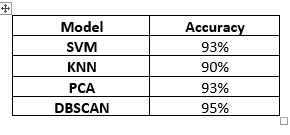

So, the best model to be used in anomaly detection according to the accuracies is the DBSCAN model, because it depends on denisty, but it needs to tune epsilon and minpoints.
And the worst model according to the accuracies is KNN model.